In [19]:
#WARN!!! 
#This cell must be excecuted before any other, other wise it will be crashed!!!!!!

%run ../../src/cluster/cluster.py

Filas eliminadas por NA/inf: 45

Resumen guardado en: ../../assets/cluster_output/resumen_configuraciones.csv
Resumen de fairness en: ../../assets/cluster_output/resumen_fairness.csv
Top 10 configuraciones en: ../../assets/cluster_output/top_10_configuraciones.csv

Top configuraciones (por silueta, luego cophenético):

                 config     distance   linkage  cophenetic  k  threshold  silhouette  ari_vs_is_fair ari_reason  \
3         Single-Euclid    euclidean    single    0.712032  3   1.476159    0.622607        0.005615         ok   
5  Complete-Mahalanobis  mahalanobis  complete    0.708706  3   8.510528    0.519260        0.004782         ok   
4   Average-Mahalanobis  mahalanobis   average    0.811798  3   5.373704    0.434169       -0.000899         ok   
6    Single-Mahalanobis  mahalanobis    single    0.650479  6   2.240874    0.406019        0.006887         ok   
1        Average-Euclid    euclidean   average    0.812787  4   2.770068    0.335485       -0.054678    

In [20]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Image

In [21]:
# Configurations:

In [22]:
OUTPUT_DIR = "../../assets/cluster_output"
TOP_N_PLOT = 10

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)


In [23]:
def _hdr(text, level=3):
    display(Markdown("#"*level + " " + text))

In [24]:
def _read_csv_safe(fname, title=None, **kwargs):
    path = os.path.join(OUTPUT_DIR, fname)
    if os.path.exists(path):
        df = pd.read_csv(path, **kwargs)
        if title:
            _hdr(title)
        display(df)
        return df
    else:
        display(Markdown(f"> ⚠️ **No encontrado:** `{fname}`"))
        return None

In [25]:
def _plot_barh_from_df(df, x_col, y_col, title, top=None):
    if df is None or x_col not in df.columns or y_col not in df.columns:
        return
    data = df.copy()
    if top:
        data = data.sort_values(y_col, ascending=False).head(top)
    _hdr(title)
    plt.figure(figsize=(8, 4))
    plt.barh(data[x_col], data[y_col])
    plt.gca().invert_yaxis()
    plt.xlabel(y_col)
    plt.tight_layout()
    plt.show()

In [26]:
def _plot_scatter(df, x_col, y_col, title):
    if df is None or {x_col, y_col}.difference(df.columns):
        return
    _hdr(title)
    plt.figure(figsize=(5, 4))
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

In [27]:
def _display_pngs(pattern, title):
    paths = sorted(glob.glob(os.path.join(OUTPUT_DIR, pattern)))
    _hdr(title)
    if not paths:
        display(Markdown(f"> ⚠️ No hay archivos que coincidan con `{pattern}`"))
        return
    for p in paths:
        display(Markdown(f"**{os.path.basename(p)}**"))
        display(Image(filename=p))

In [42]:
resumen_config = _read_csv_safe("../../assets/cluster_output/resumen_configuraciones.csv", "Summary configurations")
resumen_fairness = _read_csv_safe("../../assets/cluster_output/resumen_fairness.csv", "Summary fairness")
top_configs = _read_csv_safe("top_10_configuraciones.csv", "Top 10 configurations")


### Summary configurations

,config,distance,linkage,cophenetic,k,threshold,silhouette,ari_vs_is_fair,ari_reason,dendrogram_path,external_tables,fair_pureza_media,fair_pureza_ponderada,fair_chi2,fair_pval_chi2,fair_v_cramer
0,Single-Euclid,euclidean,single,0.712032,3,1.476159,0.622607,0.005615,ok,../../assets/cluster_output/dendrogram_Single-...,{'model_type': '../../assets/cluster_output/ta...,0.799433,0.731313,0.559330,0.756037,0.023769
1,Complete-Mahalanobis,mahalanobis,complete,0.708706,3,8.510528,0.519260,0.004782,ok,../../assets/cluster_output/dendrogram_Complet...,{'model_type': '../../assets/cluster_output/ta...,0.798697,0.731313,1.253834,0.534236,0.035588
2,Average-Mahalanobis,mahalanobis,average,0.811798,3,5.373704,0.434169,-0.000899,ok,../../assets/cluster_output/dendrogram_Average...,{'model_type': '../../assets/cluster_output/ta...,0.799567,0.731313,1.125766,0.569565,0.033721
3,Single-Mahalanobis,mahalanobis,single,0.650479,6,2.240874,0.406019,0.006887,ok,../../assets/cluster_output/dendrogram_Single-...,{'model_type': '../../assets/cluster_output/ta...,0.899592,0.732323,4.623534,0.463527,0.068339
4,Average-Euclid,euclidean,average,0.812787,4,2.770068,0.335485,-0.054678,ok,../../assets/cluster_output/dendrogram_Average...,{'model_type': '../../assets/cluster_output/ta...,0.791543,0.731313,4.220464,0.238621,0.065292
5,Complete-Euclid,euclidean,complete,0.622221,4,4.861175,0.295515,-0.048540,ok,../../assets/cluster_output/dendrogram_Complet...,{'model_type': '../../assets/cluster_output/ta...,0.745838,0.731313,3.084532,0.378775,0.055818
6,Ward-Euclid,euclidean,ward,0.438306,3,23.854953,0.199201,0.026155,ok,../../assets/cluster_output/dendrogram_Ward-Eu...,{'model_type': '../../assets/cluster_output/ta...,0.731772,0.731313,0.579457,0.748467,0.024193


### Summary fairness

,config,distance,linkage,k,threshold,silhouette,cophenetic,ari_vs_is_fair,ari_reason,fair_pureza_media,fair_pureza_ponderada,fair_pval_chi2,fair_v_cramer
0,Ward-Euclid,euclidean,ward,3,23.854953,0.199201,0.438306,0.026155,ok,0.731772,0.731313,0.748467,0.024193
1,Average-Euclid,euclidean,average,4,2.770068,0.335485,0.812787,-0.054678,ok,0.791543,0.731313,0.238621,0.065292
2,Complete-Euclid,euclidean,complete,4,4.861175,0.295515,0.622221,-0.048540,ok,0.745838,0.731313,0.378775,0.055818
3,Single-Euclid,euclidean,single,3,1.476159,0.622607,0.712032,0.005615,ok,0.799433,0.731313,0.756037,0.023769
4,Average-Mahalanobis,mahalanobis,average,3,5.373704,0.434169,0.811798,-0.000899,ok,0.799567,0.731313,0.569565,0.033721
5,Complete-Mahalanobis,mahalanobis,complete,3,8.510528,0.519260,0.708706,0.004782,ok,0.798697,0.731313,0.534236,0.035588
6,Single-Mahalanobis,mahalanobis,single,6,2.240874,0.406019,0.650479,0.006887,ok,0.899592,0.732323,0.463527,0.068339


### Top 10 configurations

,config,distance,linkage,cophenetic,k,threshold,silhouette,ari_vs_is_fair,ari_reason,dendrogram_path,external_tables,fair_pureza_media,fair_pureza_ponderada,fair_chi2,fair_pval_chi2,fair_v_cramer
0,Single-Euclid,euclidean,single,0.712032,3,1.476159,0.622607,0.005615,ok,../../assets/cluster_output/dendrogram_Single-...,{'model_type': '../../assets/cluster_output/ta...,0.799433,0.731313,0.559330,0.756037,0.023769
1,Complete-Mahalanobis,mahalanobis,complete,0.708706,3,8.510528,0.519260,0.004782,ok,../../assets/cluster_output/dendrogram_Complet...,{'model_type': '../../assets/cluster_output/ta...,0.798697,0.731313,1.253834,0.534236,0.035588
2,Average-Mahalanobis,mahalanobis,average,0.811798,3,5.373704,0.434169,-0.000899,ok,../../assets/cluster_output/dendrogram_Average...,{'model_type': '../../assets/cluster_output/ta...,0.799567,0.731313,1.125766,0.569565,0.033721
3,Single-Mahalanobis,mahalanobis,single,0.650479,6,2.240874,0.406019,0.006887,ok,../../assets/cluster_output/dendrogram_Single-...,{'model_type': '../../assets/cluster_output/ta...,0.899592,0.732323,4.623534,0.463527,0.068339
4,Average-Euclid,euclidean,average,0.812787,4,2.770068,0.335485,-0.054678,ok,../../assets/cluster_output/dendrogram_Average...,{'model_type': '../../assets/cluster_output/ta...,0.791543,0.731313,4.220464,0.238621,0.065292
5,Complete-Euclid,euclidean,complete,0.622221,4,4.861175,0.295515,-0.048540,ok,../../assets/cluster_output/dendrogram_Complet...,{'model_type': '../../assets/cluster_output/ta...,0.745838,0.731313,3.084532,0.378775,0.055818
6,Ward-Euclid,euclidean,ward,0.438306,3,23.854953,0.199201,0.026155,ok,../../assets/cluster_output/dendrogram_Ward-Eu...,{'model_type': '../../assets/cluster_output/ta...,0.731772,0.731313,0.579457,0.748467,0.024193


In [30]:
import pandas as pd

def clean_profile_table(df: pd.DataFrame) -> pd.DataFrame:
    # 1) quitar columnas 'Unnamed'
    df = df.loc[:, ~df.columns.str.contains(r'^Unnamed', case=False, na=False)]
    # 2) eliminar filas completamente vacías
    df = df.dropna(how="all")
    # 3) si la primera columna trae la palabra 'cluster' (fila-cabecera), eliminarla
    firstcol = df.columns[0]
    df = df[df[firstcol].astype(str).str.lower() != "cluster"]
    # 4) convertir la primera columna a índice 'cluster'
    df[firstcol] = pd.to_numeric(df[firstcol], errors="coerce")
    df = df.dropna(subset=[firstcol])
    df[firstcol] = df[firstcol].astype(int)
    df = df.set_index(firstcol).sort_index()
    df.index.name = "cluster"
    # 5) redondear medias/medianas si existen
    num_cols = [c for c in df.columns if any(k in c.lower() for k in ["mean","median"])]
    for c in num_cols:
        df[c] = pd.to_numeric(df[c], errors="ignore")
    df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce").round(3)
    return df

def clean_simple_table(df: pd.DataFrame) -> pd.DataFrame:
    # útil para centroides / ranking: quitar 'Unnamed' y filas vacías
    df = df.loc[:, ~df.columns.str.contains(r'^Unnamed', case=False, na=False)]
    df = df.dropna(how="all")
    return df

# --- usa tus funciones de lectura y luego limpia ---
perfil = _read_csv_safe("../../assets/cluster_output/perfil_unidades_originales.csv",
                        "Profiles (original units)")
perfil = clean_profile_table(perfil)

centroides = _read_csv_safe("../../assets/cluster_output/centroides_zscores.csv",
                            "Centroids in Z")
centroides = clean_simple_table(centroides)

ranking = _read_csv_safe("../../assets/cluster_output/ranking_variables_max_abs_z.csv",
                         "Ranking variables (max |z| per cluster)")
ranking = clean_simple_table(ranking)

display(perfil)
display(centroides)
display(ranking)


### Profiles (original units)

,Unnamed: 0,performance_score,performance_score.1,performance_score.2,co2_eq_emissions,co2_eq_emissions.1,co2_eq_emissions.2,likes,likes.1,likes.2,downloads,downloads.1,downloads.2,size,size.1,size.2
0,NaN,count,mean,median,count,mean,median,count,mean,median,count,mean,median,count,mean,median
1,cluster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3,0.9798479392119664,0.9947251609577308,3,1.0441260833469608,0.8375653425894861,3,1.0,1.0,3,44230.333333333336,29118.0,3,317351879.6666667,343266993.0
3,2.0,1024,0.7270514699843698,0.8211677075560534,1024,71.71081140679613,2.7159181301253668,1024,0.158203125,0.0,1024,127.2236328125,5.0,1024,894338743.4296875,498674093.0
4,3.0,1,0.99314902015818,0.99314902015818,1,192.68222884611995,192.68222884611995,1,0.0,0.0,1,102562.0,102562.0,1,260809205.0,260809205.0
5,4.0,3,0.9500470053574012,0.9499326315789473,3,4.5004460727881215,5.527544460835904,3,8.0,8.0,3,39145.0,5043.0,3,351237535.0,347596479.0
6,5.0,1,0.9863086942935602,0.9863086942935602,1,5.448567309047846,5.448567309047846,1,3.0,3.0,1,1770.0,1770.0,1,1340749741.0,1340749741.0
7,6.0,1,0.2726913079168186,0.2726913079168186,1,5.393079045128973,5.393079045128973,1,3.0,3.0,1,159.0,159.0,1,2950733825.0,2950733825.0


### Centroids in Z

,cluster,performance_score,co2_eq_emissions,likes,downloads,size
0,1,0.41,-0.29,0.69,4.88,-0.34
1,2,-0.25,0.22,0.08,0.15,0.18
2,3,0.44,1.72,0.00,5.39,-0.48
3,4,0.33,0.02,2.03,4.89,-0.28
4,5,0.42,0.24,1.39,4.30,0.74
5,6,-1.43,0.23,1.39,2.48,1.32


### Ranking variables (max |z| per cluster)

,Unnamed: 0,max_abs_z
0,downloads,5.39
1,likes,2.03
2,co2_eq_emissions,1.72
3,performance_score,1.43
4,size,1.32


,performance_score.1,performance_score.2,co2_eq_emissions,co2_eq_emissions.1,co2_eq_emissions.2,likes,likes.1,likes.2,downloads,downloads.1,downloads.2,size,size.1,size.2
cluster,,,,,,,,,,,,,,
1,0.99314902015818,0.99314902015818,1,192.68222884611995,192.68222884611995,1,0.0,0.0,1,102562.0,102562.0,1,260809205.0,260809205.0
1,0.9863086942935602,0.9863086942935602,1,5.448567309047846,5.448567309047846,1,3.0,3.0,1,1770.0,1770.0,1,1340749741.0,1340749741.0
1,0.2726913079168186,0.2726913079168186,1,5.393079045128973,5.393079045128973,1,3.0,3.0,1,159.0,159.0,1,2950733825.0,2950733825.0
3,0.9798479392119664,0.9947251609577308,3,1.0441260833469608,0.8375653425894861,3,1.0,1.0,3,44230.333333333336,29118.0,3,317351879.6666667,343266993.0
3,0.9500470053574012,0.9499326315789473,3,4.5004460727881215,5.527544460835904,3,8.0,8.0,3,39145.0,5043.0,3,351237535.0,347596479.0
1024,0.7270514699843698,0.8211677075560534,1024,71.71081140679613,2.7159181301253668,1024,0.158203125,0.0,1024,127.2236328125,5.0,1024,894338743.4296875,498674093.0


,cluster,performance_score,co2_eq_emissions,likes,downloads,size
0,1,0.41,-0.29,0.69,4.88,-0.34
1,2,-0.25,0.22,0.08,0.15,0.18
2,3,0.44,1.72,0.00,5.39,-0.48
3,4,0.33,0.02,2.03,4.89,-0.28
4,5,0.42,0.24,1.39,4.30,0.74
5,6,-1.43,0.23,1.39,2.48,1.32


,max_abs_z
0,5.39
1,2.03
2,1.72
3,1.43
4,1.32


In [45]:
if ranking is not None and "max_abs_z" in ranking.columns:
    _hdr("Ordered Ranking (desc)")
    display(ranking.sort_values("max_abs_z", ascending=False))

_ = _read_csv_safe("distrib_model_type_por_cluster_proporciones.csv",
                   "Distribution per cluster – model_type (proportions)", index_col=0)
_ = _read_csv_safe("distrib_clasification_fairness_por_cluster_proporciones.csv",
                   "Distribution per cluster – clasification_fairness (proportions)", index_col=0)
dist_is_fair = _read_csv_safe("distrib_is_fair_por_cluster_proporciones.csv",
                              "Distribution per cluster – is_fair (proportions)", index_col=0)

### Ordered Ranking (desc)

,max_abs_z
0,5.39
1,2.03
2,1.72
3,1.43
4,1.32


### Distribution per cluster – model_type (proportions)

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,1.000,0.000,0.000
2,0.716,0.218,0.066
3,1.000,0.000,0.000
4,1.000,0.000,0.000
5,1.000,0.000,0.000
6,0.000,1.000,0.000


### Distribution per cluster – clasification_fairness (proportions)

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,1.000,0.000,0.000,0.000
2,0.270,0.232,0.271,0.227
3,0.000,0.000,0.000,1.000
4,0.333,0.000,0.000,0.667
5,0.000,0.000,0.000,1.000
6,0.000,0.000,1.000,0.000


### Distribution per cluster – is_fair (proportions)

,False,True
cluster,,
1,0.000,1.000
2,0.730,0.270
3,1.000,0.000
4,0.667,0.333
5,1.000,0.000
6,1.000,0.000


In [46]:
dataset = _read_csv_safe("dataset_con_clusters.csv", "Dataset with cluster labels (head)")
if dataset is not None:
    _hdr("Fast view")
    display(dataset.head(10))


### Dataset with cluster labels (head)

,modelId,datasets,datasets_size,co2_eq_emissions,co2_reported,source,training_type,geographical_location,environment,performance_score,downloads,likes,library_name,domain,size,created_at,size_efficency,datasets_size_efficency,auto,pm_accuracy,pm_f1,pm_rouge1,pm_rougeL,model_type,clasification_fairness,is_fair,cluster_hc
0,en_lg,['Eric Peter/autonlp-data-EN-LUG'],NaN,133.021988,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.513276,14,0,"['transformers', 'pytorch']",NLP,3.081921e+08,2022-01-05,2.316851e+06,NaN,True,NaN,NaN,0.525404,0.501696,type2 (rouge),Inefficient,False,2.0
1,lg_en,['EricPeter/autonlp-data-MarianMT_lg_en'],NaN,126.344463,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.602463,14,1,"['transformers', 'pytorch']",NLP,3.083194e+08,2022-01-05,2.440308e+06,NaN,True,NaN,NaN,0.624613,0.581830,type2 (rouge),Inefficient,False,2.0
2,autonlp-triage-35248482,['Aimendo/autonlp-data-triage'],NaN,7.989145,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.961060,45,0,"['transformers', 'pytorch']",NLP,4.380438e+08,2021-11-23,5.482988e+07,NaN,True,0.972865,0.949538,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0
3,autonlp-Test-530014983,['Ajay191191/autonlp-data-Test'],NaN,55.101963,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.929787,43,0,"['transformers', 'pytorch']",NLP,4.333314e+08,2022-01-25,7.864173e+06,NaN,True,0.929884,0.929690,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0
4,autonlp-Feedback1-479512837,['Anamika/autonlp-data-Feedback1'],NaN,123.880231,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.778492,13,0,"['transformers', 'pytorch']",NLP,1.123320e+09,2022-01-06,9.067793e+06,NaN,True,0.796112,0.761635,NaN,NaN,type1 (accuracy & f1),Inefficient,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,roberta-frame-CP,['davis901/autotrain-data-imdb-textclassificat...,NaN,3.313266,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.999000,0,0,"['transformers', 'pytorch']",NLP,1.421587e+09,2023-04-04,4.290592e+08,NaN,True,0.999000,0.999000,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0
1074,postnashville_antitrans_telegram-46622115298,['sefaozalpadl/autotrain-data-postnashville_an...,NaN,0.443449,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.758460,0,0,"['transformers', 'pytorch']",NLP,7.377718e+08,2023-04-04,1.663714e+09,NaN,True,0.818000,0.707000,NaN,NaN,type1 (accuracy & f1),Green but Weak,False,2.0
1075,autotrain-activity_parameters-46735115465,['WilliamWen/autotrain-data-activity_parameters'],NaN,0.804404,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.873792,0,0,"['transformers', 'pytorch']",NLP,1.336520e+09,2023-04-04,1.661503e+09,NaN,True,0.990000,0.782000,NaN,NaN,type1 (accuracy & f1),Fair and Efficient,True,2.0
1076,activity_params_02_the_best,['WilliamWen/autotrain-data-activity_parameter...,NaN,0.401257,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.893609,0,0,"['transformers', 'pytorch']",NLP,1.336520e+09,2023-04-04,3.330836e+09,NaN,True,0.989000,0.815000,NaN,NaN,type1 (accuracy & f1),Fair and Efficient,True,2.0


### Fast view

,modelId,datasets,datasets_size,co2_eq_emissions,co2_reported,source,training_type,geographical_location,environment,performance_score,downloads,likes,library_name,domain,size,created_at,size_efficency,datasets_size_efficency,auto,pm_accuracy,pm_f1,pm_rouge1,pm_rougeL,model_type,clasification_fairness,is_fair,cluster_hc
0,en_lg,['Eric Peter/autonlp-data-EN-LUG'],NaN,133.021988,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.513276,14,0,"['transformers', 'pytorch']",NLP,3.081921e+08,2022-01-05,2.316851e+06,NaN,True,NaN,NaN,0.525404,0.501696,type2 (rouge),Inefficient,False,2.0
1,lg_en,['EricPeter/autonlp-data-MarianMT_lg_en'],NaN,126.344463,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.602463,14,1,"['transformers', 'pytorch']",NLP,3.083194e+08,2022-01-05,2.440308e+06,NaN,True,NaN,NaN,0.624613,0.581830,type2 (rouge),Inefficient,False,2.0
2,autonlp-triage-35248482,['Aimendo/autonlp-data-triage'],NaN,7.989145,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.961060,45,0,"['transformers', 'pytorch']",NLP,4.380438e+08,2021-11-23,5.482988e+07,NaN,True,0.972865,0.949538,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0
3,autonlp-Test-530014983,['Ajay191191/autonlp-data-Test'],NaN,55.101963,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.929787,43,0,"['transformers', 'pytorch']",NLP,4.333314e+08,2022-01-25,7.864173e+06,NaN,True,0.929884,0.929690,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0
4,autonlp-Feedback1-479512837,['Anamika/autonlp-data-Feedback1'],NaN,123.880231,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.778492,13,0,"['transformers', 'pytorch']",NLP,1.123320e+09,2022-01-06,9.067793e+06,NaN,True,0.796112,0.761635,NaN,NaN,type1 (accuracy & f1),Inefficient,False,2.0
5,autonlp-fa-473312409,['Anamika/autonlp-data-fa'],NaN,25.128736,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.769995,14,0,"['transformers', 'pytorch']",NLP,3.285413e+08,2022-01-04,1.307433e+07,NaN,True,0.799065,0.742966,NaN,NaN,type1 (accuracy & f1),Inefficient,False,2.0
6,nirvana,['Anorak/autonlp-data-Niravana-test2'],NaN,4.214013,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.355738,3,0,"['transformers', 'pytorch']",NLP,2.279632e+09,2021-10-17,5.409646e+08,NaN,True,NaN,NaN,0.411808,0.313106,type2 (rouge),Inefficient,False,2.0
7,autonlp-Scientific_Title_Generator-34558227,['AryanLala/autonlp-data-Scientific_Title_Gene...,NaN,137.605741,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.423813,46,19,"['transformers', 'pytorch']",NLP,2.279632e+09,2021-11-20,1.656640e+07,NaN,True,NaN,NaN,0.448482,0.401716,type2 (rouge),Inefficient,False,2.0
8,kaggle-comp-test,['Crasher222/autonlp-data-kaggle-test'],NaN,60.744727,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.862886,26,0,"['transformers', 'pytorch']",NLP,1.340750e+09,2021-10-24,2.207187e+07,NaN,True,0.861533,0.864243,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0
9,autonlp-pos-tag-bosque,['Emanuel/autonlp-data-pos-tag-bosque'],NaN,6.210727,1,AutoTrain,Not Specified,Not Specified,Not Specified,0.972130,55,2,"['transformers', 'pytorch']",NLP,4.334659e+08,2021-10-18,6.979310e+07,NaN,True,0.971431,0.972831,NaN,NaN,type1 (accuracy & f1),Powerful but Expensive,False,2.0


In [60]:
def plot_stacked(config, label):
    row = panel[(panel["config"]==config) & (panel["label"]==label)]
    if row.empty: 
        print("[No encontrado]", config, label); 
        return
    props = pd.DataFrame(json.loads(row.iloc[0]["props_json"]))
    ax = props.plot(kind="bar", stacked=True, figsize=(6,4))
    ax.set_title(f"{label} per cluster — {config}")
    ax.set_xlabel("cluster"); ax.set_ylabel("proportion")
    ax.legend(title=label, bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout(); plt.show()

def plot_heatmap(config, label):
    import matplotlib.pyplot as plt
    import numpy as np
    row = panel[(panel["config"]==config) & (panel["label"]==label)]
    if row.empty: 
        print("[No encontrado]", config, label); 
        return
    props = pd.DataFrame(json.loads(row.iloc[0]["props_json"]))
    fig, ax = plt.subplots(figsize=(6,3.6))
    im = ax.imshow(props.values, aspect="auto")
    ax.set_xticks(range(props.shape[1])); ax.set_xticklabels(props.columns, rotation=45, ha="right")
    ax.set_yticks(range(props.shape[0])); ax.set_yticklabels(props.index)
    for i in range(props.shape[0]):
        for j in range(props.shape[1]):
            ax.text(j, i, f"{props.iat[i,j]:.2f}", ha="center", va="center")
    ax.set_title(f"Heatmap {label} — {config}")
    fig.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
    plt.tight_layout(); plt.show()


In [61]:

import os, re, ast, json
import numpy as np
import pandas as pd
from glob import glob
from scipy.stats import chi2_contingency, fisher_exact
from IPython.display import display

OUTPUT_DIR = "../../assets/cluster_output/"

KNOWN_LABELS = [
    "clasificacion_fairness",   # <- tiene '_'
    "is_fair",
    "model_type",
]

def parse_tbl_path(path):
    name = os.path.basename(path)
    if not name.startswith("tabla_") or not name.endswith(".csv"):
        return None, None
    core = name[len("tabla_"):-4]  # quita 'tabla_' y '.csv'
    # Busca el sufijo más largo que sea un label conocido
    for lab in sorted(KNOWN_LABELS, key=len, reverse=True):
        suf = "_" + lab
        if core.endswith(suf):
            config = core[: -len(suf)]
            return config, lab
    # fallback (por si aparece algo nuevo)
    if "_" in core:
        config, lab = core.rsplit("_", 1)
        return config, lab
    return None, None

def fairness_stats(counts):
    out = {"chi2": np.nan, "pval_chi2": np.nan, "v_cramer": np.nan, "pval_fisher": np.nan}
    if counts.shape[0] >= 2 and counts.shape[1] >= 2:
        chi2, p, dof, _ = chi2_contingency(counts.values)
        out["chi2"] = float(chi2); out["pval_chi2"] = float(p)
        n = counts.values.sum()
        out["v_cramer"] = float(np.sqrt(chi2 / (n*(min(counts.shape)-1)))) if n>0 else np.nan
        if counts.shape == (2,2):
            _, p_f = fisher_exact(counts.values)
            out["pval_fisher"] = float(p_f)
    return out

# 1) Carga resumen de configuraciones (k, silhouette, cophenetic, etc.)
cfg_path = os.path.join(OUTPUT_DIR, "resumen_configuraciones.csv")
cfgs = pd.read_csv(cfg_path) if os.path.exists(cfg_path) else pd.DataFrame()

# 2) Recorre todas las tablas "tabla_*.csv"
rows = []
for p in sorted(glob(os.path.join(OUTPUT_DIR, "tabla_*.csv"))):
    config, label = parse_tbl_path(p)
    if not config: 
        continue
    counts = pd.read_csv(p, index_col=0)
    # proporciones por clúster
    props = counts.div(counts.sum(axis=1), axis=0).fillna(0.0)
    # métricas
    stats = fairness_stats(counts)
    # purezas
    row_sums = counts.sum(axis=1).replace(0,np.nan)
    purezas = props.max(axis=1)
    pureza_media = float(purezas.mean()) if purezas.notna().any() else np.nan
    peso = row_sums/row_sums.sum() if row_sums.sum()>0 else None
    pureza_pond = float((purezas*peso).sum()) if peso is not None else np.nan

    rows.append({
        "config": config,
        "label": label,
        "k": int(counts.shape[0]),
        "counts_json": counts.to_json(),
        "props_json": props.to_json(),
        "pureza_media": pureza_media,
        "pureza_ponderada": pureza_pond,
        **stats
    })

panel = pd.DataFrame(rows)

# 3) Une con métricas de cada configuración (silhouette / cophenetic / threshold si existe)
if not cfgs.empty:
    take = cfgs[["config","distance","linkage","k","threshold","silhouette","cophenetic","ari_vs_is_fair","ari_reason"] \
               if "ari_reason" in cfgs.columns else ["config","distance","linkage","k","threshold","silhouette","cophenetic","ari_vs_is_fair"]]
    panel = panel.merge(take, on="config", how="left")

# 4) Vista rápida
panel_sorted = panel.sort_values(["label","silhouette","cophenetic"], ascending=[True, False, False])
display(panel_sorted.head(20))

# 5) Helper para ver una tabla concreta como DataFrame de proporciones/controles
def show_table(config, label="is_fair", proportions=True):
    row = panel[(panel["config"]==config) & (panel["label"]==label)]
    if row.empty:
        print("[No encontrado]", config, label); 
        return

    key = "props_json" if proportions else "counts_json"
    j = row.iloc[0][key]

    # ✅ evitar warning de pandas: parseamos nosotros el JSON
    obj = json.loads(j)
    df = pd.DataFrame(obj)

    if df.index.dtype == "O" and all(str(i).isdigit() for i in df.index):
        df.index = df.index.astype(int)
    if df.columns.dtype == "O" and all(str(c).isdigit() for c in df.columns):
        pass

    print(f"\n{config} — {label} — {'proporciones' if proportions else 'conteos'}")
    display(df)

,config,label,k_x,counts_json,props_json,pureza_media,pureza_ponderada,chi2,pval_chi2,v_cramer,pval_fisher,distance,linkage,k_y,threshold,silhouette,cophenetic,ari_vs_is_fair,ari_reason
0,Average-Euclid_clasification,fairness,4,"{""Fair and Efficient"":{""1"":3,""2"":2,""3"":10,""4"":...","{""Fair and Efficient"":{""1"":0.25,""2"":0.09523809...",0.310091,0.278788,5.478471,0.790765,0.042949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Average-Mahalanobis_clasification,fairness,3,"{""Fair and Efficient"":{""1"":3,""2"":1,""3"":262},""G...","{""Fair and Efficient"":{""1"":0.1875,""2"":0.142857...",0.426623,0.275758,7.327261,0.291640,0.060833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Complete-Euclid_clasification,fairness,4,"{""Fair and Efficient"":{""1"":236,""2"":11,""3"":3,""4...","{""Fair and Efficient"":{""1"":0.2753792299,""2"":0....",0.310115,0.282828,8.738522,0.461753,0.054243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Complete-Mahalanobis_clasification,fairness,3,"{""Fair and Efficient"":{""1"":1,""2"":2,""3"":263},""G...","{""Fair and Efficient"":{""1"":0.1111111111,""2"":0....",0.423525,0.274747,7.310182,0.293112,0.060762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Single-Euclid_clasification,fairness,3,"{""Fair and Efficient"":{""1"":3,""2"":263,""3"":0},""G...","{""Fair and Efficient"":{""1"":0.3333333333,""2"":0....",0.533900,0.269697,4.079666,0.665896,0.045392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Single-Mahalanobis_clasification,fairness,6,"{""Fair and Efficient"":{""1"":0,""2"":264,""3"":0,""4""...","{""Fair and Efficient"":{""1"":0.0,""2"":0.269113149...",0.767074,0.273737,16.576136,0.344828,0.074707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Ward-Euclid_clasification,fairness,3,"{""Fair and Efficient"":{""1"":65,""2"":109,""3"":92},...","{""Fair and Efficient"":{""1"":0.2674897119,""2"":0....",0.288973,0.287879,5.495312,0.482024,0.052682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Single-Euclid,is_fair,3,"{""False"":{""1"":6,""2"":717,""3"":1},""True"":{""1"":3,""...","{""False"":{""1"":0.6666666667,""2"":0.7316326531,""3...",0.799433,0.731313,0.559330,0.756037,0.023769,NaN,euclidean,single,3.0,1.476159,0.622607,0.712032,0.005615,ok
10,Complete-Mahalanobis,is_fair,3,"{""False"":{""1"":8,""2"":7,""3"":709},""True"":{""1"":1,""...","{""False"":{""1"":0.8888888889,""2"":0.7777777778,""3...",0.798697,0.731313,1.253834,0.534236,0.035588,NaN,mahalanobis,complete,3.0,8.510528,0.519260,0.708706,0.004782,ok
4,Average-Mahalanobis,is_fair,3,"{""False"":{""1"":13,""2"":6,""3"":705},""True"":{""1"":3,...","{""False"":{""1"":0.8125,""2"":0.8571428571,""3"":0.72...",0.799567,0.731313,1.125766,0.569565,0.033721,NaN,mahalanobis,average,3.0,5.373704,0.434169,0.811798,-0.000899,ok


In [62]:
def available_labels(config):
    s = panel.loc[panel["config"]==config, "label"].unique().tolist()
    print(f"Labels disponibles para {config}: {s}")
available_labels("Average-Euclid")
show_table("Average-Euclid", "is_fair", proportions=True)

Labels disponibles para Average-Euclid: ['is_fair', 'model_type']

Average-Euclid — is_fair — proporciones


,False,True
1,0.750000,0.250000
2,0.904762,0.095238
3,0.787234,0.212766
4,0.724176,0.275824


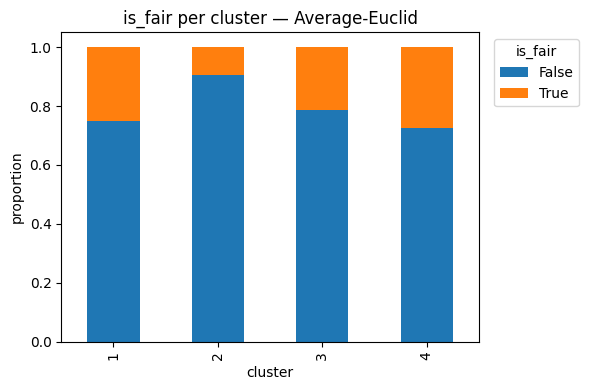

In [63]:
plot_stacked("Average-Euclid", "is_fair")

### Silhouette por configuración (Top 10)

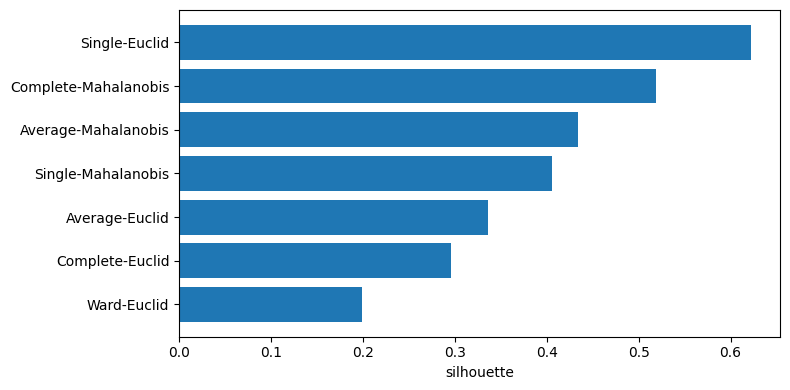

### Cophenetic vs. Silhouette

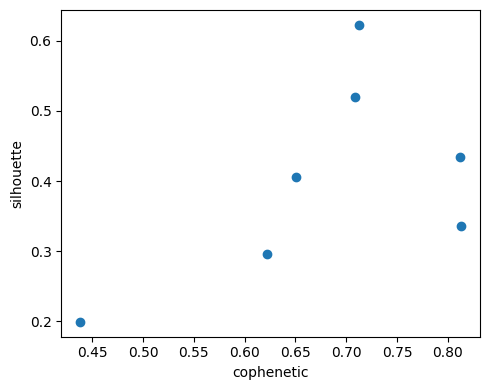

In [56]:
_plot_barh_from_df(resumen_config, x_col="config", y_col="silhouette",
                   title=f"Silhouette por configuración (Top {TOP_N_PLOT})", top=TOP_N_PLOT)

_plot_scatter(resumen_config, "cophenetic", "silhouette", "Cophenetic vs. Silhouette")

### Proportion is_fair per clúster

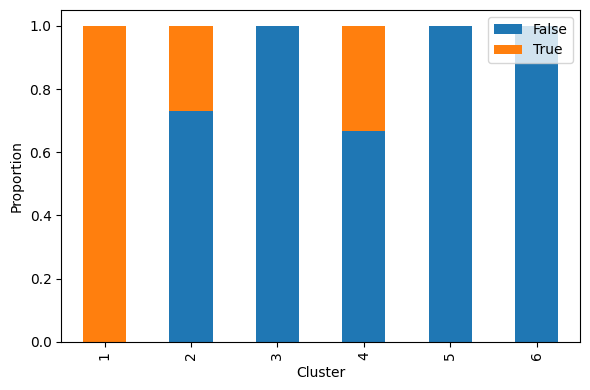

In [38]:
if dist_is_fair is not None:
    _hdr("Proportion is_fair per clúster")
    dist_plot = dist_is_fair.div(dist_is_fair.sum(axis=1), axis=0)
    ax = dist_plot.plot(kind="bar", stacked=True, figsize=(6, 4))
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Proportion")
    plt.tight_layout()
    plt.show()


In [57]:
import glob
tablas_ext = sorted(glob.glob(os.path.join(OUTPUT_DIR, "tabla_*_*.csv")))

_hdr("External tables per configuration (counts)")
if tablas_ext:
    for p in tablas_ext:
        display(Markdown(f"**{os.path.basename(p)}**"))
        display(pd.read_csv(p, index_col=0))
else:
    display(Markdown("> ⚠️ No se encontraron `tabla_*_*.csv`"))


### External tables per configuration (counts)

**tabla_Average-Euclid_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,3,2,3,4
2,2,6,7,6
3,10,13,14,10
4,251,204,242,213


**tabla_Average-Euclid_is_fair.csv**

,False,True
cluster,,
1,9,3
2,19,2
3,37,10
4,659,251


**tabla_Average-Euclid_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,9,3,0
2,17,4,0
3,33,13,1
4,661,183,66


**tabla_Average-Mahalanobis_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,3,2,7,4
2,1,1,1,4
3,262,222,258,225


**tabla_Average-Mahalanobis_is_fair.csv**

,False,True
cluster,,
1,13,3
2,6,1
3,705,262


**tabla_Average-Mahalanobis_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,11,5,0
2,5,2,0
3,704,196,67


**tabla_Complete-Euclid_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,236,189,226,206
2,11,17,23,12
3,3,1,3,3
4,16,18,14,12


**tabla_Complete-Euclid_is_fair.csv**

,False,True
cluster,,
1,621,236
2,52,11
3,7,3
4,44,16


**tabla_Complete-Euclid_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,622,173,62
2,47,15,1
3,7,3,0
4,44,12,4


**tabla_Complete-Mahalanobis_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,1,2,1,5
2,2,2,4,1
3,263,221,261,227


**tabla_Complete-Mahalanobis_is_fair.csv**

,False,True
cluster,,
1,8,1
2,7,2
3,709,263


**tabla_Complete-Mahalanobis_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,7,2,0
2,6,3,0
3,707,198,67


**tabla_Single-Euclid_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,3,1,3,2
2,263,224,263,230
3,0,0,0,1


**tabla_Single-Euclid_is_fair.csv**

,False,True
cluster,,
1,6,3
2,717,263
3,1,0


**tabla_Single-Euclid_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,6,3,0
2,713,200,67
3,1,0,0


**tabla_Single-Mahalanobis_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,0,1,0,2
2,264,224,264,229
3,0,0,0,1
4,2,0,1,0
5,0,0,1,0
6,0,0,0,1


**tabla_Single-Mahalanobis_is_fair.csv**

,False,True
cluster,,
1,3,0
2,717,264
3,1,0
4,1,2
5,1,0
6,1,0


**tabla_Single-Mahalanobis_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,1,2,0
2,714,200,67
3,1,0,0
4,3,0,0
5,0,1,0
6,1,0,0


**tabla_Ward-Euclid_clasification_fairness.csv**

,Fair and Efficient,Green but Weak,Inefficient,Powerful but Expensive
cluster,,,,
1,65,55,72,51
2,109,88,90,101
3,92,82,104,81


**tabla_Ward-Euclid_is_fair.csv**

,False,True
cluster,,
1,178,65
2,279,109
3,267,92


**tabla_Ward-Euclid_model_type.csv**

,type1 (accuracy & f1),type2 (rouge),type3 (accuracy)
cluster,,,
1,164,59,20
2,282,70,36
3,274,74,11


### Dendrogramas generados

**dendrogram_Average-Euclid.png**

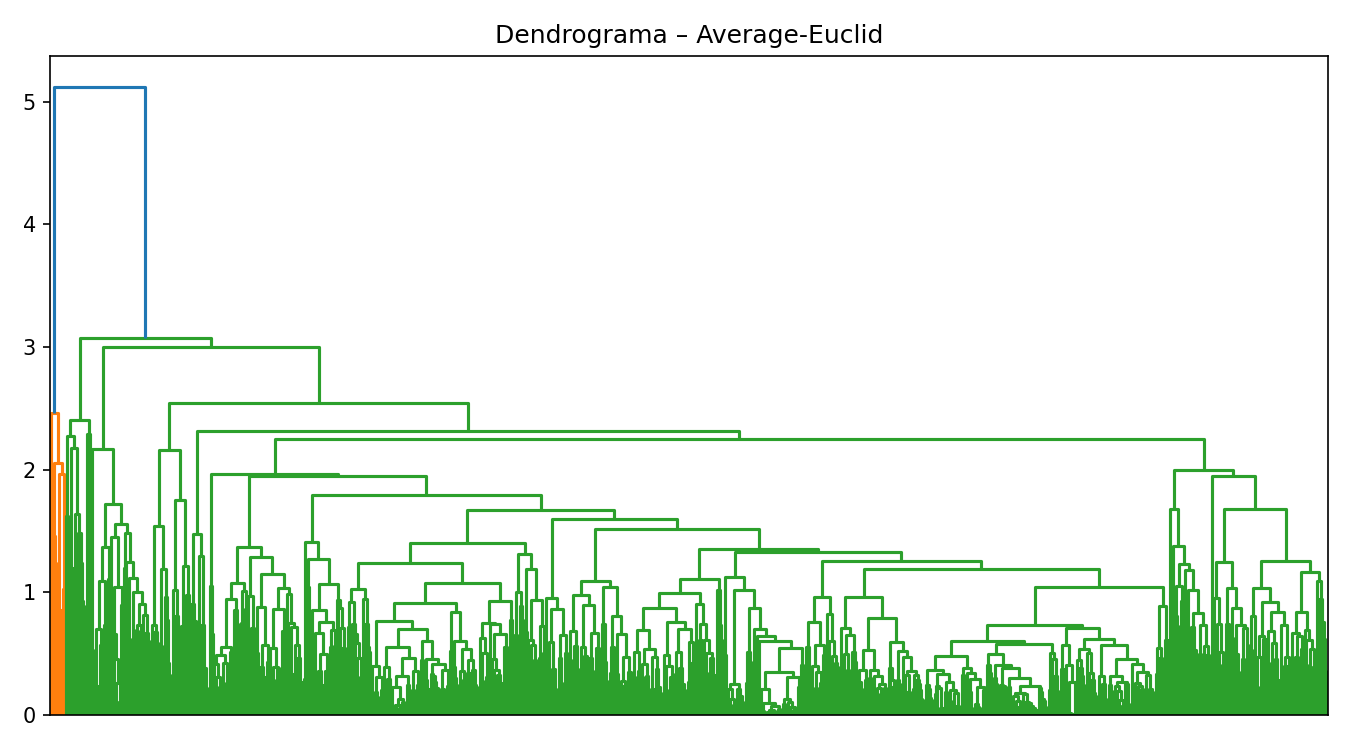

**dendrogram_Average-Mahalanobis.png**

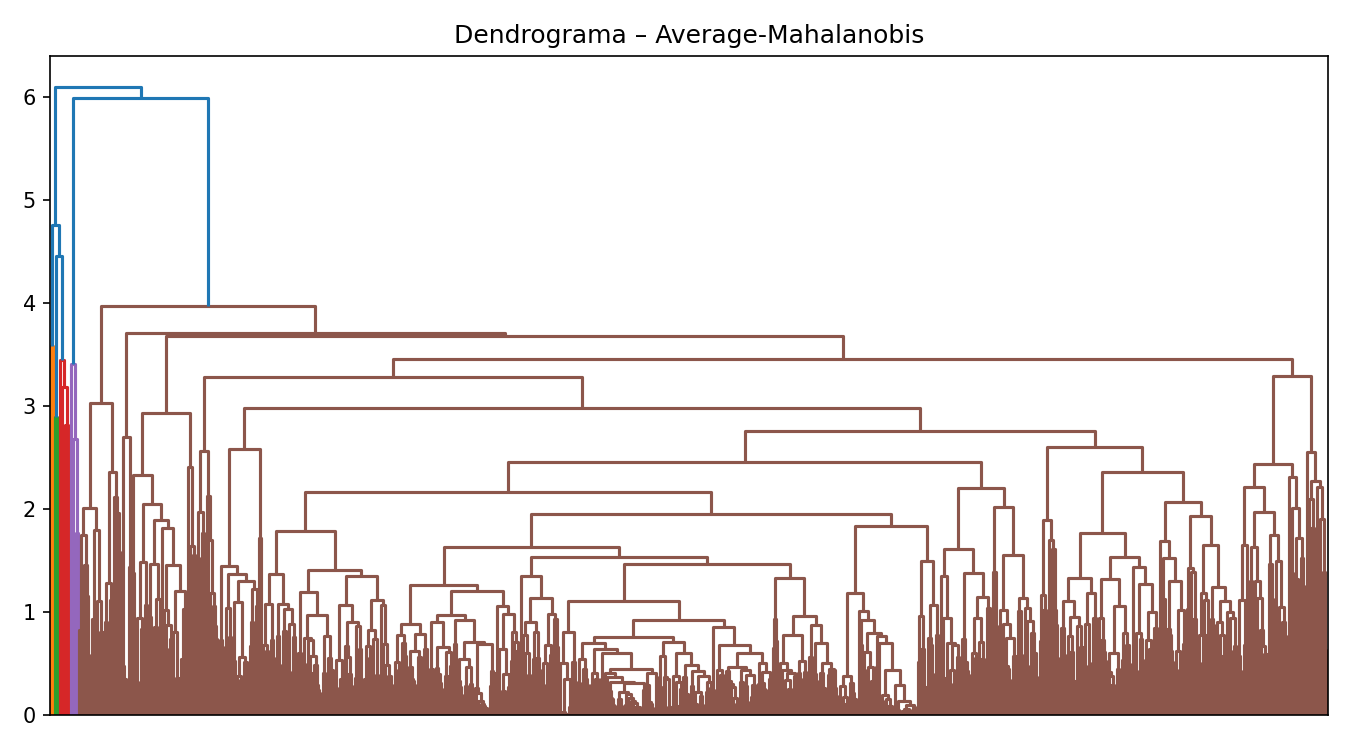

**dendrogram_Complete-Euclid.png**

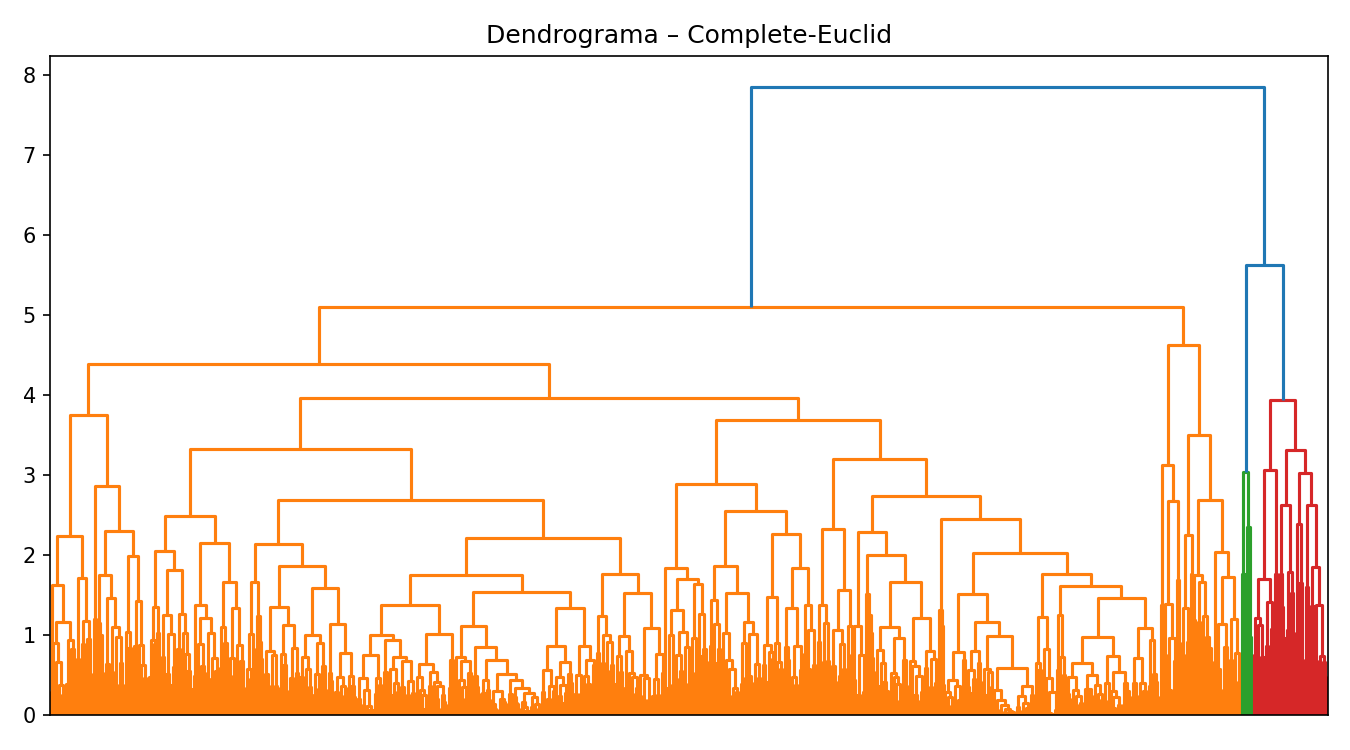

**dendrogram_Complete-Mahalanobis.png**

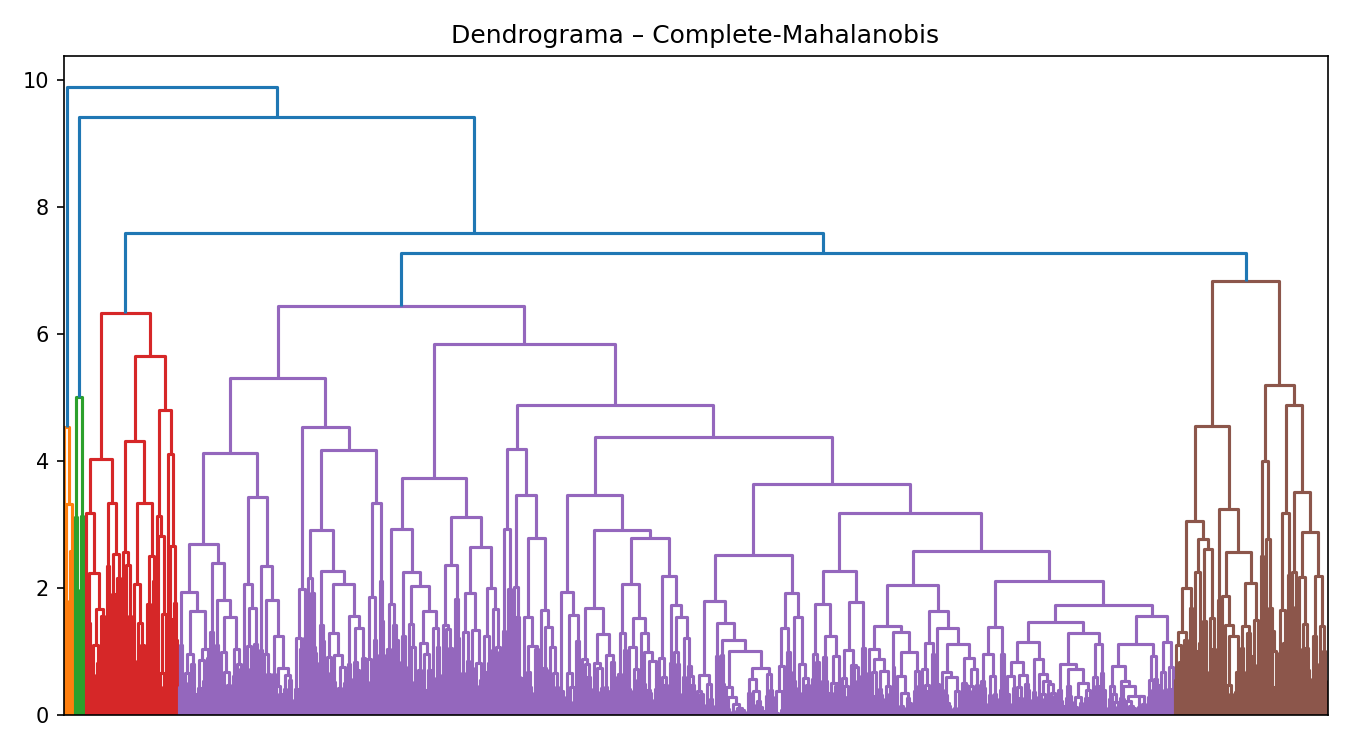

**dendrogram_Single-Euclid.png**

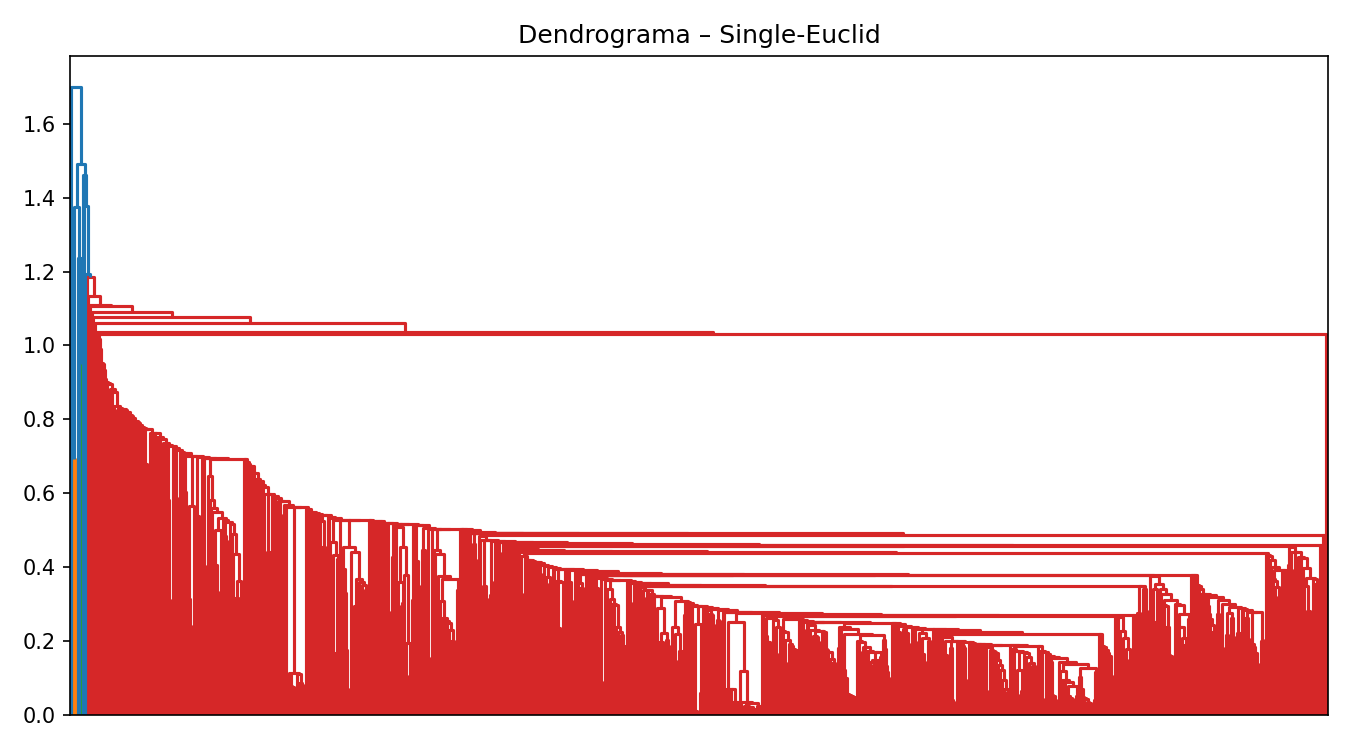

**dendrogram_Single-Mahalanobis.png**

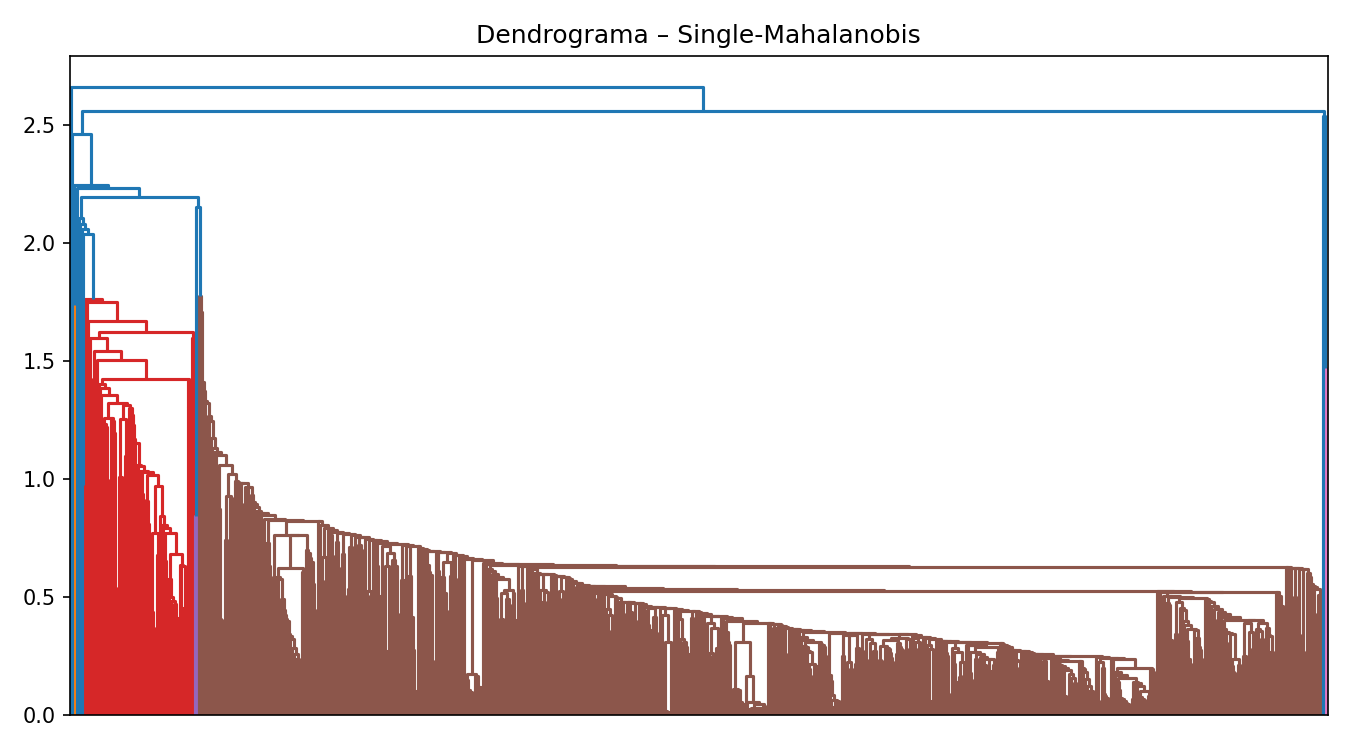

**dendrogram_Ward-Euclid.png**

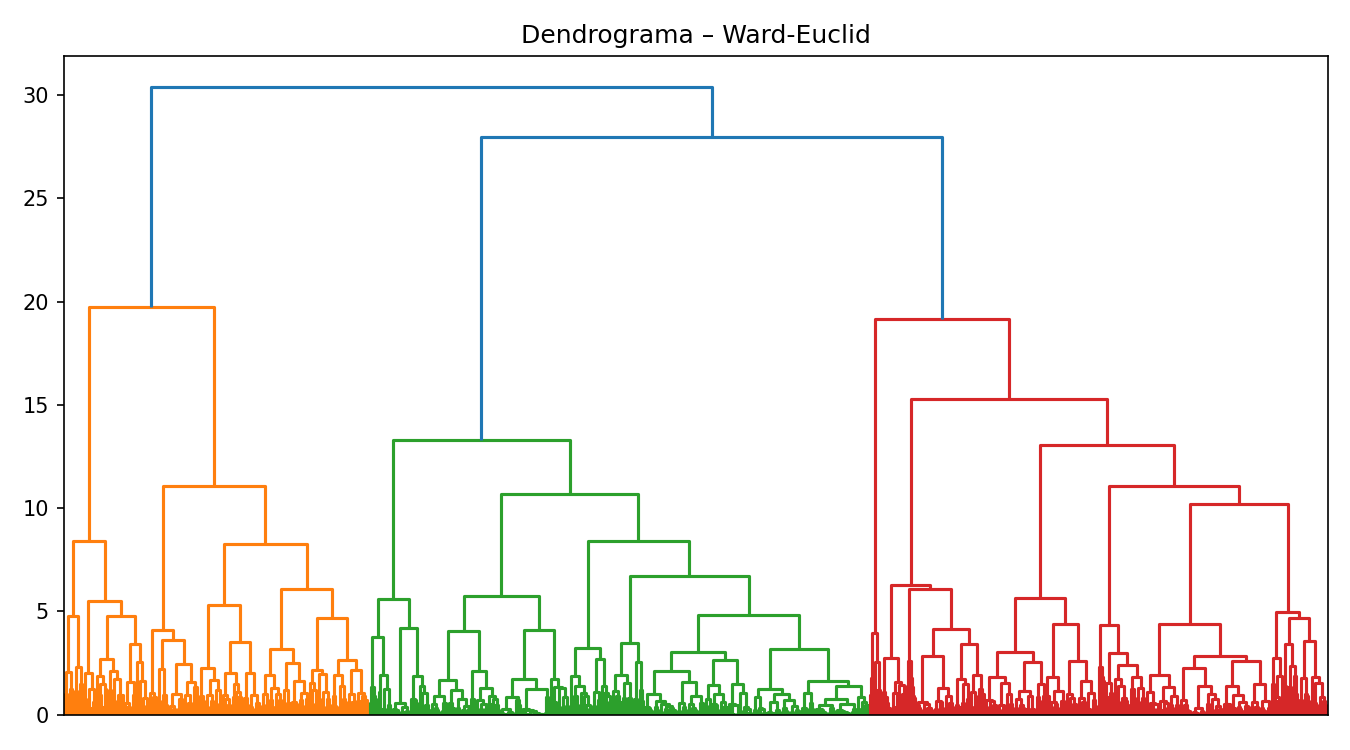

In [58]:
_display_pngs("dendrogram_*.png", "Dendrogramas generados")